In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.losses import categorical_crossentropy


import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.12.0


In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/archive.zip"

In [ ]:
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = "/content/train" # Directory containing the training data
test_dir = "/content/test"  # Directory containing the validation data

In [ ]:
import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.models import Sequential, Model,load_model
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation
from tensorflow.keras.models import Model, Sequential
from keras.applications.nasnet import NASNetLarge
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,

        rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255
                                  )
train_dataset  = train_datagen.flow_from_directory(directory = '/content/train',
                                                   target_size = (224, 224),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   batch_size = 256)

valid_dataset = valid_datagen.flow_from_directory(directory = '/content/train',
                                                  target_size = (224, 224),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 256)
test_dataset = test_datagen.flow_from_directory(directory = '/content/test',
                                                  target_size = (224, 224),
                                                  class_mode = 'categorical',
                                                  batch_size = 256)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
def DenseNet169_Model():
  # load the DenseNet169 network, ensuring the head FC layer sets are left off
  baseModel = tf.keras.applications.DenseNet169(include_top=False, weights='imagenet', input_shape=(224, 224, 3), pooling=None)
  # construct the head of the model that will be placed on top of the the base model
  output = baseModel.output
  output = tf.keras.layers.GlobalAveragePooling2D()(output)
  output = tf.keras.layers.Dense(1664, activation="relu")(output)
  output = tf.keras.layers.Dense(832, activation="relu")(output)
  output = tf.keras.layers.Dense(7, activation="softmax")(output)
  # place the head FC model on top of the base model (this will become the actual model we will train)
  model = tf.keras.Model(inputs=baseModel.input, outputs=output)
  # loop over all layers in the base model and freeze them so they will not be updated during the first training process
  for layer in baseModel.layers:
    layer.trainable = False
  return model

model = DenseNet169_Model()
# compile our model
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics="accuracy")


51877672/51877672 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

EPOCHS = 5
BATCH_SIZE = 256

# Number of samples in your training and validation sets
train_num = train_dataset.samples
valid_num = valid_dataset.samples

# Fit the model
history = model.fit(
    train_dataset,
    epochs=5,
    steps_per_epoch=train_num // BATCH_SIZE,
    validation_data=valid_dataset,
    validation_steps=valid_num // BATCH_SIZE,
    verbose=1
)

Epoch 1/5
89/89 [==============================] - 408s 4s/step - loss: 1.8060 - accuracy: 0.3276 - val_loss: 1.5516 - val_accuracy: 0.4022
Epoch 2/5
89/89 [==============================] - 362s 4s/step - loss: 1.5115 - accuracy: 0.4211 - val_loss: 1.4655 - val_accuracy: 0.4444
Epoch 3/5
89/89 [==============================] - 359s 4s/step - loss: 1.4586 - accuracy: 0.4413 - val_loss: 1.4631 - val_accuracy: 0.4501
Epoch 4/5
89/89 [==============================] - 363s 4s/step - loss: 1.4220 - accuracy: 0.4584 - val_loss: 1.4284 - val_accuracy: 0.4570
Epoch 5/5
89/89 [==============================] - 352s 4s/step - loss: 1.4022 - accuracy: 0.4661 - val_loss: 1.3876 - val_accuracy: 0.4691


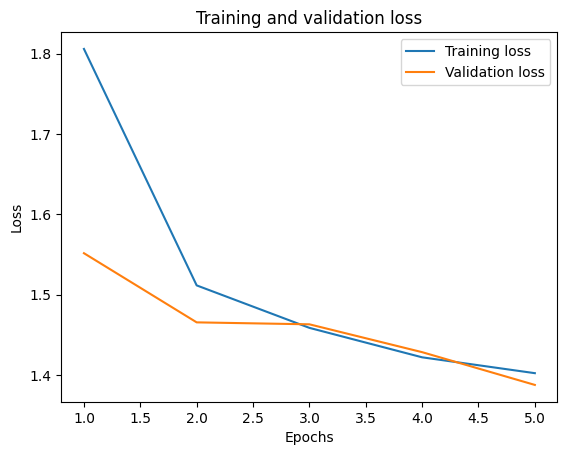

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



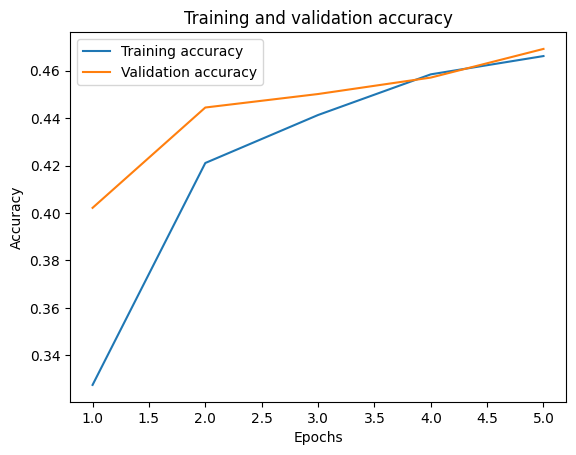

In [ ]:
# Plot the train and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()